In [12]:


#libraries
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from matplotlib import pyplot
eps = np.finfo(float).eps
from numpy import log2 as log
# Quick value count calculator
from collections import Counter

(303, 14)
number of training examples: 212
number of testing examples: 91


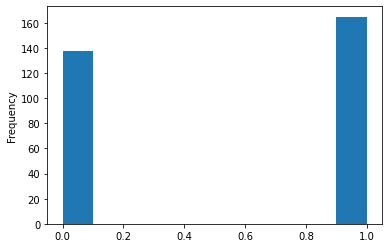

In [13]:

#a function for read data set
df = pd.read_csv("/Users/najmeh/Desktop/master/Ml/projet/heart.csv")
features = df.columns[:-1].tolist()
print(df.shape)
df.head(2)

#transform data two class yes=1 and no=0 in target
pd.cut(df['target'], bins=2).value_counts()
df['target'].plot(kind='hist')

#spilit data to two group(training and test)

training_data = df.sample(frac=0.7, random_state=25)
testing_data = df.drop(training_data.index)

print(f"number of training examples: {training_data.shape[0]}")
print(f"number of testing examples: {testing_data.shape[0]}")

In [14]:
#calculate entropy
entropy_node = 0  
#Unique objects - 'Yes'=1 , 'No'=0
#here attribute = target
values = df.target.unique()  
for value in values:
    fraction = df.target.value_counts()[value]/len(df.target)  
    entropy_node += -fraction*np.log2(fraction)

In [15]:
#show us = entropy of the whole dataset
entropy_node

0.994264609261905

In [16]:
def ent(df,attribute):
    target_variables = df.target.unique()  #This gives all 'Yes'=1 and 'No'=0
    variables = df[attribute].unique()    


    entropy_attribute = 0
    for variable in variables:
        entropy_each_feature = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df.target ==target_variable]) #numerator
            den = len(df[attribute][df[attribute]==variable])  
            fraction = num/(den+eps)  #pi
            entropy_each_feature += -fraction*log(fraction+eps) 
        fraction2 = den/len(df)
        entropy_attribute += -fraction2*entropy_each_feature   #Sums up all the entropy ETaste

    return(abs(entropy_attribute))

In [17]:
#find entropy of all attribute
a_entropy = {k:ent(df,k) for k in df.keys()[:-1]}
a_entropy

{'age': 0.8589593301514084,
 'sex': 0.9351263006686779,
 'cp': 0.7896657536419616,
 'trestbps': 0.8538365690615689,
 'chol': 0.43452808237653207,
 'fbs': 0.9936987268324742,
 'restecg': 0.9701897729925275,
 'thalach': 0.6591664620576265,
 'exang': 0.852054115265318,
 'oldpeak': 0.740876197858777,
 'slope': 0.8774308133364888,
 'ca': 0.808307301299677,
 'thal': 0.781013907223049}

In [18]:
#define a function for calculate information gain
def ig(e_dataset,e_attr):
    return(e_dataset-e_attr)
    

In [19]:
IG = {k:ig(entropy_node,a_entropy[k]) for k in a_entropy}
t22=[]

In [20]:
def find_entropy(df):
    Class = df.keys()[-1]  
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy
  
  
def find_entropy_attribute(df,attribute):
#To make the code generic, changing target variable class name
  Class = df.keys()[-1]  
  #This gives all 'Yes' and 'No'
  target_variables = df[Class].unique()  
  #This gives different features in that attribute (like '0','y' in sex)
  variables = df[attribute].unique()    
  entropy2 = 0
  for variable in variables:
      entropy = 0
      for target_variable in target_variables:
          num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
          den = len(df[attribute][df[attribute]==variable])
          fraction = num/(den+eps)
          entropy += -fraction*log(fraction+eps)
      fraction2 = den/len(df)
      entropy2 += -fraction2*entropy
  return abs(entropy2)

#find an attribute that has max ig
def find_winner(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:
        #Entropy_att.append(find_entropy_attribute(df,key))
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(IG)]
  
#get subtable for a node
def get_subtable(df, node,value):
  return df[df[node] == value].reset_index(drop=True)

# a function for build DT
def buildTree(df,tree=None): 
    Class = df.keys()[-1]   
    
    

    #attribute maximum information gain
    node = find_winner(df)
    print(node)
    
   
    attValue = np.unique(df[node])
    
    #create tree    
    if tree is None:                    
        tree={}
        tree[node] = {}
    

    for value in attValue:
        
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable['target'],return_counts=True)      

        #Checking purity of subset that purity shoould be 0
        if len(counts)==1:
            tree[node][value] = clValue[0]
            
        else:        
            #Calling the function recursively 
            tree[node][value] = buildTree(subtable) 
                   
    return tree
  
  

## D-Tree 

In [21]:
t=buildTree(df)
t

chol
age
age
age
age
age
age
age
age
age
age
age
age
age
sex
age
age
age
age
age
thalach
age
age
age
trestbps
age
age
age
age
age
trestbps
age
age
age
age
age
age
age
age
age
age
age
age
age
age
age
age
age
age
age


{'chol': {126: 1,
  131: 0,
  141: 1,
  149: {'age': {49: 0, 71: 1}},
  157: 1,
  160: 1,
  164: 0,
  166: 0,
  167: 0,
  168: 1,
  169: 0,
  172: 0,
  174: 0,
  175: 1,
  176: 0,
  177: {'age': {43: 0, 46: 1, 59: 0, 65: 1}},
  178: 1,
  180: 1,
  182: 1,
  183: 1,
  184: 0,
  185: 0,
  186: 1,
  187: 0,
  188: 0,
  192: 1,
  193: {'age': {56: 1, 68: 0}},
  195: 1,
  196: 1,
  197: {'age': {44: 0, 46: 1, 53: 1, 58: 1, 63: 0, 76: 1}},
  198: {'age': {35: 0, 41: 1}},
  199: 1,
  200: 0,
  201: 1,
  203: {'age': {41: 1, 53: 0, 61: 0}},
  204: {'age': {29: 1, 41: 1, 46: 1, 47: 1, 52: 0, 59: 0}},
  205: {'age': {52: 1, 55: 0}},
  206: 0,
  207: {'age': {57: 1, 61: 0}},
  208: 1,
  209: 1,
  210: 1,
  211: 1,
  212: {'age': {52: 0, 59: 1, 64: 0, 66: 0, 67: 0}},
  213: 1,
  214: 1,
  215: 1,
  216: {'age': {53: 1, 58: 0}},
  217: 0,
  218: 0,
  219: {'age': {39: 0, 44: 1, 50: 1}},
  220: 1,
  221: 1,
  222: 1,
  223: {'age': {40: 0, 52: 1, 67: 1}},
  224: 0,
  225: 0,
  226: 1,
  227: 1,
  22

In [22]:

#transforme data in secound way
#df['age_group'] = pd.cut(df['age'], bins=[0, 12, 19, 61, 100])
#df['sex'] = pd.cut(df['sex'], bins=[0,1])
#df['cp'] = pd.cut(df['cp'], bins=[0,1,2,3])
#df['trestbps'] = pd.cut(df['age'], bins=[94,105,116,126,137,147,158,169,179,190,201])
#df['chol'] = pd.cut(df['chol'], bins=[30, 34, 39, 44, 49, 54, 59, 64, 69, 74,79])
#df['fbs'] = pd.cut(df['fbs'], bins=[0,1])
#df['restecg'] = pd.cut(df['restecg'], bins=[0,1])
#df['exang'] = pd.cut(df['exang'], bins=[0,1])
#df['thalach'] = pd.cut(df['thalach'], bins=[70,85,98,11,124,137,150,163,176,189,202])
#df['oldpeak'] = pd.cut(df['oldpeak'], bins=[-1,0.62,1.24,1.86,2.48,3.10,3.72,4.34,4.98])
#df['ca'] = pd.cut(df['ca'], bins=[0,1,2,3])
#df['thal'] = pd.cut(df['thal'], bins=[0,1,2,3])









def pred(inst,tree):
    for nodes in tree.keys():
        
        value=inst[nodes]
        
        tt=tree[nodes][value]
        
        prediction=0
        
        if type(tt) is dict:
            prediction = pred(inst,tt)
        else:
            prediction = tt
            break;
            
    return prediction
    

import pprint
q=df.shape[0]
acc=0
pp=[]

for i in range(q):
    ss=df.loc[i, : ]
    prediction = pred(ss,t)
    if prediction != ['class']:
        acc=acc+1
        pp=np.append(pp,i)
        
pprint.pprint(t)
print('Accuracy = ')
print(1-(acc/df.shape[0]))
print('missclassified data= ')
pprint.pprint(pp)

{'chol': {126: 1,
          131: 0,
          141: 1,
          149: {'age': {49: 0, 71: 1}},
          157: 1,
          160: 1,
          164: 0,
          166: 0,
          167: 0,
          168: 1,
          169: 0,
          172: 0,
          174: 0,
          175: 1,
          176: 0,
          177: {'age': {43: 0, 46: 1, 59: 0, 65: 1}},
          178: 1,
          180: 1,
          182: 1,
          183: 1,
          184: 0,
          185: 0,
          186: 1,
          187: 0,
          188: 0,
          192: 1,
          193: {'age': {56: 1, 68: 0}},
          195: 1,
          196: 1,
          197: {'age': {44: 0, 46: 1, 53: 1, 58: 1, 63: 0, 76: 1}},
          198: {'age': {35: 0, 41: 1}},
          199: 1,
          200: 0,
          201: 1,
          203: {'age': {41: 1, 53: 0, 61: 0}},
          204: {'age': {29: 1, 41: 1, 46: 1, 47: 1, 52: 0, 59: 0}},
          205: {'age': {52: 1, 55: 0}},
          206: 0,
          207: {'age': {57: 1, 61: 0}},
          208: 1,
     

/var/folders/x5/1gwz9t2x3wz7f193pgwy6rcc0000gn/T/ipykernel_1997/2804633133.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if prediction != ['class']:
